###Nama         : Septavia Navis

###NIM 		     : 212410103039

###Kelas 	     : Kecerdasan Komputasional B

                                  Modul 4 Praktikum Data Mining

                                       Classification Tree

**TUGAS**

**Ulangilah tahapan klasifikasi menggunakan dataset wine, pima indian diabetes, breast cancer. Hitunglah akurasinya berdasar confusion matrix dengan pesentase data testing 20%, 30%, dan 40%**

---

**JAWAB**

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine, load_breast_cancer
from matplotlib import pyplot as plt
from sklearn import datasets, tree

Library diatas digunakan untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data. Library ini adalah contoh implementasi yang memuat beberapa library dan modul di dalamnya untuk melakukan klasifikasi menggunakan Decision Tree Classifier pada beberapa dataset yang tersedia dalam library sklearn.

- ***import pandas as pd*** dan ***import numpy as np*** berguna untuk untuk import library yang mana dapat memanggil file lain di dalam satu module yang berbeda.
- ***import sklearn***,  library utama untuk machine learning.
- ***from sklearn.model_selection import train_test_split***,  digunakan untuk membagi dataset menjadi data training dan data testing.
- ***from sklearn.metrics import confusion_matrix, accuracy_score***, digunakan untuk menghitung confusion matrix dan akurasi.
- ***from sklearn.tree import DecisionTreeClassifier***, digunakan untuk membangun model klasifikasi menggunakan Decision Tree Classifier.
- ***from sklearn.datasets import load_wine, load_diabetes, load_breast_cancer***, digunakan untuk memuat beberapa dataset yang tersedia dalam sklearn, yaitu dataset wine, diabetes, dan breast cancer.
- ***from matplotlib import pyplot as plt***, digunakan untuk menampilkan hasil visualisasi dari model Decision Tree Classifier.
- ***from sklearn import datasets, tree***, digunakan untuk memuat dataset dan model Decision Tree Classifier dari library sklearn.

---

###**DATASET WINE**

Pengumpulan Dataset

In [3]:
wine = load_wine()
wine_data=pd.DataFrame(wine.data)

wine_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Kode diatas bertujuan untuk memuat dataset wine dari library sklearn dan menampilkannya dalam bentuk DataFrame menggunakan library pandas.
- ***wine = load_wine()***, load_wine()** adalah sebuah fungsi dari library sklearn yang digunakan untuk memuat dataset wine.
- ***wine_data=pd.DataFrame(wine.data)*** adalah sebuah perintah yang membuat sebuah DataFrame yang berisi data dari dataset wine yang telah dimuat sebelumnya menggunakan **load_wine()**.
- ***wine_data***, digunakan untuk menampilkan dataset wine.

In [4]:
print ("Dataset Shape: ", wine_data.shape)
print(" ")
print ("Features Name :\n ", wine.feature_names)
print(" ")
print ("Dataset:\n ", wine_data.head())

Dataset Shape:  (178, 13)
 
Features Name :
  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
 
Dataset:
        0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  


Kode diatas bertujuan untuk menampilkan informasi penting tentang dataset wine yang telah dimuat sebelumnya menggunakan library sklearn.
- ***print ("Dataset Shape: ", wine_data.shape)***,  digunakan untuk menampilkan dimensi dataset wine yang telah dimuat, yaitu jumlah sampel (baris) dan jumlah variabel (kolom).
- ***print ("Features Name : ", wine.feature_names)***, digunakan untuk menampilkan nama-nama variabel dalam dataset wine.
- ***print ("Dataset:\n ", wine_data.head())***,  digunakan untuk menampilkan lima baris pertama dari dataset wine yang telah dimuat sebelumnya.

---

Pemrosesan Dataset

In [5]:
# membagi kolom dengan variabel X Y
X = wine_data.values[:, 0:13]
Y = wine.target
print(X)
print(Y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Kode diatas bertujuan untuk mempersiapkan data untuk dilakukan proses klasifikasi menggunakan metode Decision Tree Classifier. Data tersebut telah dimuat sebelumnya dari dataset wine menggunakan library sklearn dan disimpan dalam bentuk numpy array.
- ***X = wine_data.values[:, 0:13]***, digunakan untuk memisahkan variabel-variabel (fitur) yang terdapat dalam dataset wine. Numpy array ini diperoleh dengan mengambil nilai dari DataFrame **wine_data** menggunakan metode values. Kode ini memilih semua baris dan kolom dari indeks 0 sampai indeks 12 (13 kolom pertama) pada **wine_data**, karena indeks 13 adalah kelas yang akan menjadi target dari proses klasifikasi. Variabel X akan menjadi array yang berisi nilai-nilai dari variabel-variabel tersebut.
- ***Y = wine.target***, digunakan untuk memisahkan label kelas dari dataset wine. Variabel Y akan menjadi array yang berisi nilai dari target kelas pada setiap sampel dalam dataset. Dalam kasus ini, terdapat tiga jenis wine pada dataset ini, sehingga variabel Y akan berisi nilai-nilai 0, 1, atau 2.

---

Pembuatan Model Klasifikasi

In [9]:
# melakukan klasifikasi menggunakan Decision Tree dan menghitung akurasi berdasarkan confusion matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Kode diatas bertujuan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada library sklearn dan melatih model tersebut dengan menggunakan data training.
- ***classifier = DecisionTreeClassifier()***, digunakan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada sklearn. DecisionTreeClassifier adalah salah satu algoritme klasifikasi pohon keputusan (decision tree) pada sklearn yang digunakan untuk membangun model klasifikasi dari data input.
- ***classifier.fit(X_train, y_train)***, digunakan untuk melatih model klasifikasi classifier dengan menggunakan data training **X_train** dan label kelas **y_train**. Fungsi fit akan melakukan proses pembelajaran model dari data training, sehingga model dapat digunakan untuk melakukan prediksi pada data testing. Setelah proses training selesai, model classifier akan tersimpan di dalam memori dan siap digunakan untuk melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

---

Pelatihan Model Klasifikasi

In [8]:
# membagi dataset menjadi data training dan data testing dengan persentase data testing yang ditentukan

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

X_test, y_test
# X_train, y_train

(array([[1.164000e+01, 2.060000e+00, 2.460000e+00, 2.160000e+01,
         8.400000e+01, 1.950000e+00, 1.690000e+00, 4.800000e-01,
         1.350000e+00, 2.800000e+00, 1.000000e+00, 2.750000e+00,
         6.800000e+02],
        [1.348000e+01, 1.670000e+00, 2.640000e+00, 2.250000e+01,
         8.900000e+01, 2.600000e+00, 1.100000e+00, 5.200000e-01,
         2.290000e+00, 1.175000e+01, 5.700000e-01, 1.780000e+00,
         6.200000e+02],
        [1.412000e+01, 1.480000e+00, 2.320000e+00, 1.680000e+01,
         9.500000e+01, 2.200000e+00, 2.430000e+00, 2.600000e-01,
         1.570000e+00, 5.000000e+00, 1.170000e+00, 2.820000e+00,
         1.280000e+03],
        [1.196000e+01, 1.090000e+00, 2.300000e+00, 2.100000e+01,
         1.010000e+02, 3.380000e+00, 2.140000e+00, 1.300000e-01,
         1.650000e+00, 3.210000e+00, 9.900000e-01, 3.130000e+00,
         8.860000e+02],
        [1.434000e+01, 1.680000e+00, 2.700000e+00, 2.500000e+01,
         9.800000e+01, 2.800000e+00, 1.310000e+00, 5.300000

Kode diatas bertujuan untuk membagi dataset menjadi data training dan data testing, dengan ukuran data testing sebesar 20% dari seluruh dataset, dan seed untuk memperoleh hasil yang sama pada setiap percobaan.
- ***train_test_split*** adalah sebuah fungsi dari sklearn yang digunakan untuk membagi dataset menjadi data training dan data testing. Fungsi ini membutuhkan input berupa dataset yang ingin dibagi, label kelas pada dataset tersebut, ukuran data testing yang diinginkan (dalam hal ini 20%), dan seed number (random_state) untuk memperoleh hasil yang sama pada setiap percobaan.
- ***X*** dan ***Y*** merupakan variabel yang sudah dipersiapkan sebelumnya, yaitu numpy array yang berisi variabel-variabel dan label kelas pada dataset wine.
- ***X_train, X_test, y_train, y_test***,  digunakan untuk menampung hasil pemisahan dataset menjadi data training dan data testing.
- ***test_size = 0.2***, digunakan untuk menentukan ukuran data testing sebesar 20% dari seluruh dataset.
- ***random_state = 100***, digunakan sebagai seed number untuk memperoleh hasil yang sama pada setiap percobaan. Dalam hal ini, kita akan selalu memperoleh hasil yang sama ketika kita melakukan pemisahan dataset menjadi data training dan data testing.
- ***X_test, y_test***, akan berisi data testing untuk variabel-variabel dan label kelas.
- ***X_train, y_train***, akan berisi data training untuk variabel-variabel dan label kelas.

---

Pengujian Model Klasifikasi

In [10]:
y_pred = classifier.predict(X_test)
print('Data test:\n', y_pred)

Data test:
 [1 2 0 0 0 1 1 1 1 1 2 1 2 2 2 0 2 0 1 0 0 0 1 1 0 0 1 1 1 2 2 1 0 1 2 1]


Kode di atas digunakan untuk melakukan prediksi terhadap label kelas pada data testing dengan menggunakan model klasifikasi classifier yang sudah dilatih sebelumnya.
- ***y_pred = classifier.predict(X_test)***, digunakan untuk melakukan prediksi terhadap label kelas pada data testing. Fungsi predict akan menghasilkan prediksi label kelas pada data testing berdasarkan model klasifikasi yang sudah dilatih sebelumnya.
- ***print('Data test:\n', y_pred)***, **y_pred** digunakan untuk menampung hasil prediksi dari fungsi predict. Variabel y_pred akan berisi array prediksi label kelas pada data testing.

---

Evaluasi Model Klasifikasi

Confusion matrix:
 [[ 8  0  0]
 [ 1 14  0]
 [ 2  2  9]]
Accuracy (testing data 20%): 86.11%
 
Tree plot:
 |--- feature_12 <= 755.00
|   |--- feature_6 <= 1.29
|   |   |--- feature_9 <= 3.72
|   |   |   |--- class: 1
|   |   |--- feature_9 >  3.72
|   |   |   |--- class: 2
|   |--- feature_6 >  1.29
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_9 <= 4.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  4.06
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_5 <= 2.12
|   |   |--- feature_10 <= 0.80
|   |   |   |--- class: 2
|   |   |--- feature_10 >  0.80
|   |   |   |--- class: 1
|   |--- feature_5 >  2.12
|   |   |--- feature_4 <= 135.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  135.50
|   |   |   |--- class: 1



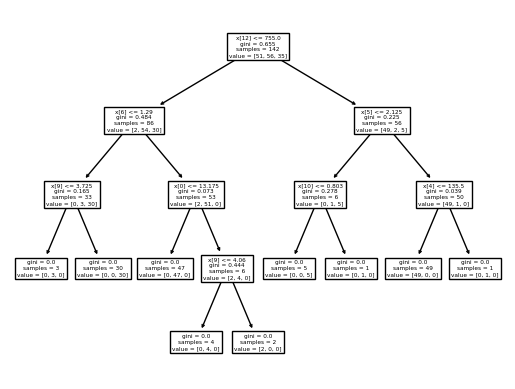

In [11]:
# testing data 20%
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', cm)
print('Accuracy (testing data 20%%): %.2f%%' % (accuracy*100))

print(' ')

tree.plot_tree(classifier)
text_representation = tree.export_text(classifier)
print('Tree plot:\n', text_representation)

Kode di atas digunakan untuk melakukan evaluasi terhadap performa model klasifikasi dengan menggunakan confusion matrix dan menghitung akurasi, serta memvisualisasikan model klasifikasi dalam bentuk pohon keputusan.
- ***cm = confusion_matrix(y_test, y_pred)***, digunakan untuk menghitung confusion matrix berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***accuracy = accuracy_score(y_test, y_pred)***, digunakan untuk menghitung akurasi dari model klasifikasi berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***tree.plot_tree(classifier)***, digunakan untuk memvisualisasikan model klasifikasi dalam bentuk pohon keputusan. Fungsi **plot_tree** akan menghasilkan visualisasi pohon keputusan dari model klasifikasi classifier.
- ***tree.export_text(classifier)***, digunakan untuk menghasilkan representasi teks dari pohon keputusan yang dibuat oleh model klasifikasi classifier.
- ***text_representation***, digunakan untuk menampung representasi teks dari pohon keputusan.

###**DATASET PIMA INDIAN DIABETES**

Pengumpulan Dataset

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes_data=pd.DataFrame(diabetes)

diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Kode di atas digunakan untuk membaca dataset diabetes dari file csv (diabetes.csv) dan memuat datanya ke dalam sebuah dataframe pandas (diabetes_data).
- ***pd.read_csv('diabetes.csv')*** digunakan untuk membaca file csv (diabetes.csv) yang berisi dataset diabetes. Fungsi **read_csv** akan menghasilkan sebuah dataframe pandas berdasarkan data yang ada pada file csv.
- ***diabetes_data=pd.DataFrame(diabetes)*** digunakan untuk menampung dataframe pandas yang dihasilkan dari file csv ke dalam sebuah variabel bernama diabetes_data. Variabel ini akan digunakan sebagai data input pada proses klasifikasi.
- ***diabetes_data***, digunakan untuk menampilkan dataset pima indian diabetes.

---

Pemrosesan Dataset

In [ ]:
# membagi kolom dengan variabel X Y
X = diabetes_data.values[:, 0:8]
Y = diabetes_data.values[:, 8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

Kode di atas digunakan untuk mempersiapkan data input dan target output yang akan digunakan pada proses klasifikasi.
- ***X = diabetes_data.values[:, 0:8]***, digunakan untuk mengambil nilai dari dataframe diabetes_data. Fungsi ini akan menghasilkan array numpy yang terdapat pada kolom 0 sampai dengan 7 (kolom ke-0 sampai kolom ke-7) pada dataset diabetes dan menampungnya ke dalam variabel X. Variabel X akan digunakan sebagai data input pada proses klasifikasi.
- ***Y = diabetes_data.values[:, 8]***,  digunakan untuk mengambil nilai dari array numpy yang terdapat pada kolom 8 (kolom ke-8) pada dataset diabetes dan menampungnya ke dalam variabel Y. Variabel Y akan digunakan sebagai target output pada proses klasifikasi. Pada dataset diabetes, kolom ke-8 berisi nilai target output atau label kelas yang akan diprediksi pada proses klasifikasi, yaitu apakah seseorang mengidap diabetes atau tidak.

---

Pembuatan Model Klasifikasi

In [ ]:
# melakukan klasifikasi menggunakan Decission Tree dan menghitung akurasi berdasarkan confusion matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Kode diatas bertujuan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada library sklearn dan melatih model tersebut dengan menggunakan data training.
- ***classifier = DecisionTreeClassifier()***, digunakan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada sklearn. DecisionTreeClassifier adalah salah satu algoritme klasifikasi pohon keputusan (decision tree) pada sklearn yang digunakan untuk membangun model klasifikasi dari data input.
- ***classifier.fit(X_train, y_train)***, digunakan untuk melatih model klasifikasi classifier dengan menggunakan data training **X_train** dan label kelas **y_train**. Fungsi fit akan melakukan proses pembelajaran model dari data training, sehingga model dapat digunakan untuk melakukan prediksi pada data testing. Setelah proses training selesai, model classifier akan tersimpan di dalam memori dan siap digunakan untuk melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

---

Pelatihan Model Klasifikasi

In [ ]:
# membagi dataset menjadi data training dan data testing dengan persentase data testing yang ditentukan

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

X_test, y_test
# X_train, y_train

(array([[1.00e+00, 7.90e+01, 6.00e+01, ..., 4.35e+01, 6.78e-01, 2.30e+01],
        [0.00e+00, 8.60e+01, 6.80e+01, ..., 3.58e+01, 2.38e-01, 2.50e+01],
        [5.00e+00, 1.62e+02, 1.04e+02, ..., 3.77e+01, 1.51e-01, 5.20e+01],
        ...,
        [8.00e+00, 1.55e+02, 6.20e+01, ..., 3.40e+01, 5.43e-01, 4.60e+01],
        [1.00e+00, 1.64e+02, 8.20e+01, ..., 3.28e+01, 3.41e-01, 5.00e+01],
        [2.00e+00, 5.60e+01, 5.60e+01, ..., 2.42e+01, 3.32e-01, 2.20e+01]]),
 array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
   

Kode diatas bertujuan untuk membagi dataset menjadi data training dan data testing, dengan ukuran data testing sebesar 20% dari seluruh dataset, dan seed untuk memperoleh hasil yang sama pada setiap percobaan.
- ***train_test_split*** adalah sebuah fungsi dari sklearn yang digunakan untuk membagi dataset menjadi data training dan data testing. Fungsi ini membutuhkan input berupa dataset yang ingin dibagi, label kelas pada dataset tersebut, ukuran data testing yang diinginkan (dalam hal ini 20%), dan seed number (random_state) untuk memperoleh hasil yang sama pada setiap percobaan.
- ***X*** dan ***Y*** merupakan variabel yang sudah dipersiapkan sebelumnya, yaitu numpy array yang berisi variabel-variabel dan label kelas pada dataset wine.
- ***X_train, X_test, y_train, y_test***,  digunakan untuk menampung hasil pemisahan dataset menjadi data training dan data testing.
- ***test_size = 0.3***, digunakan untuk menentukan ukuran data testing sebesar 30% dari seluruh dataset.
- ***random_state = 100***, digunakan sebagai seed number untuk memperoleh hasil yang sama pada setiap percobaan. Dalam hal ini, kita akan selalu memperoleh hasil yang sama ketika kita melakukan pemisahan dataset menjadi data training dan data testing.
- ***X_test, y_test***, akan berisi data testing untuk variabel-variabel dan label kelas.
- ***X_train, y_train***, akan berisi data training untuk variabel-variabel dan label kelas.

---

Pengujian Model Klasifikasi

In [ ]:
y_pred = classifier.predict(X_test)
print('Data test:\n', y_pred)

Data test:
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]


Kode di atas digunakan untuk melakukan prediksi terhadap label kelas pada data testing dengan menggunakan model klasifikasi classifier yang sudah dilatih sebelumnya.
- ***y_pred = classifier.predict(X_test)***, digunakan untuk melakukan prediksi terhadap label kelas pada data testing. Fungsi predict akan menghasilkan prediksi label kelas pada data testing berdasarkan model klasifikasi yang sudah dilatih sebelumnya.
- ***print('Data test:\n', y_pred)***, **y_pred** digunakan untuk menampung hasil prediksi dari fungsi predict. Variabel y_pred akan berisi array prediksi label kelas pada data testing.

---

Evaluasi Model Klasifikasi

Confusion matrix:
 [[110  40]
 [ 38  43]]
Accuracy (testing data 30%): 66.23%
 
Tree plot:
 |--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 49.10
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- feature_5 <= 30.95
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  30.95
|   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 31.80
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 102.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  102.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_5 >  31.80
|   |  

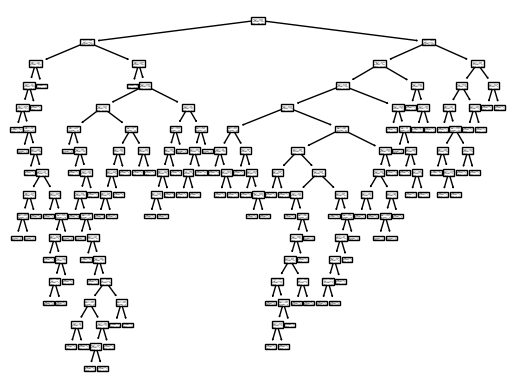

In [ ]:
# testing data 30%
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', cm)
print('Accuracy (testing data 30%%): %.2f%%' % (accuracy*100))\

print(' ')

tree.plot_tree(classifier)
text_representation = tree.export_text(classifier)
print('Tree plot:\n', text_representation)

Kode di atas digunakan untuk melakukan evaluasi terhadap performa model klasifikasi dengan menggunakan confusion matrix dan menghitung akurasi, serta memvisualisasikan model klasifikasi dalam bentuk pohon keputusan.
- ***cm = confusion_matrix(y_test, y_pred)***, digunakan untuk menghitung confusion matrix berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***accuracy = accuracy_score(y_test, y_pred)***, digunakan untuk menghitung akurasi dari model klasifikasi berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***tree.plot_tree(classifier)***, digunakan untuk memvisualisasikan model klasifikasi dalam bentuk pohon keputusan. Fungsi **plot_tree** akan menghasilkan visualisasi pohon keputusan dari model klasifikasi classifier.
- ***tree.export_text(classifier)***, digunakan untuk menghasilkan representasi teks dari pohon keputusan yang dibuat oleh model klasifikasi classifier.
- ***text_representation***, digunakan untuk menampung representasi teks dari pohon keputusan.

###**DATASET BREAST CANCER**

Pembuatan Dataset

In [ ]:
cancer = load_breast_cancer()
cancer_data=pd.DataFrame(cancer.data)

cancer_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Kode diatas bertujuan untuk memuat dataset breast cancer dari library sklearn dan menampilkannya dalam bentuk DataFrame menggunakan library pandas.
- ***cancer = load_breast_cancer()***, load_breast_cancer()** adalah sebuah fungsi dari library sklearn yang digunakan untuk memuat dataset breast cancer.
- ***cancer_data=pd.DataFrame(cancer.data)*** adalah sebuah perintah yang membuat sebuah DataFrame yang berisi data dari dataset breast cancer yang telah dimuat sebelumnya menggunakan **load_breast_cancer()**.
- ***cancer_data***, digunakan untuk menampilkan dataset breast cancer.

In [ ]:
print ("Dataset Shape: ", cancer_data.shape)
print(" ")
print ("Features Name :\n ", cancer.feature_names)
print(" ")
print ("Dataset:\n ", cancer_data.head())

Dataset Shape:  (569, 30)
 
Features Name :
  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
 
Dataset:
        0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597

Kode diatas bertujuan untuk menampilkan informasi penting tentang dataset wine yang telah dimuat sebelumnya menggunakan library sklearn.
- **print ("Dataset Shape: ", cancer_data.shape)***,  digunakan untuk menampilkan dimensi dataset breast cancer yang telah dimuat, yaitu jumlah sampel (baris) dan jumlah variabel (kolom).
- ***print ("Features Name : ", cancer.feature_names)***, digunakan untuk menampilkan nama-nama variabel dalam dataset breast cancer.
- ***print ("Dataset:\n ", cancer_data.head())***,  digunakan untuk menampilkan lima baris pertama dari dataset breast cancer yang telah dimuat sebelumnya.

---

Pemrosesan Dataset

In [ ]:
# membagi kolom dengan variabel X Y
X = cancer_data.values[:, 0:30]
Y = cancer.target
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Kode diatas bertujuan untuk mempersiapkan data untuk dilakukan proses klasifikasi menggunakan metode Decision Tree Classifier. Data tersebut telah dimuat sebelumnya dari dataset wine menggunakan library sklearn dan disimpan dalam bentuk numpy array.
- ***X = cancer_data.values[:, 0:30]***, digunakan untuk memisahkan variabel-variabel (fitur) yang terdapat dalam dataset breast cancer. Numpy array ini diperoleh dengan mengambil nilai dari DataFrame **cancer_data** menggunakan metode values. Kode ini memilih semua baris dan kolom dari indeks 0 sampai indeks 29 (30 kolom pertama) pada **cancer_data**, karena indeks 30 adalah kelas yang akan menjadi target dari proses klasifikasi. Variabel X akan menjadi array yang berisi nilai-nilai dari variabel-variabel tersebut.
- ***Y = cancer.target***, digunakan untuk memisahkan label kelas dari dataset breast cancer. Variabel Y akan menjadi array yang berisi nilai dari target kelas pada setiap sampel dalam dataset. Dalam kasus ini, terdapat dua jenis breast cancer pada dataset ini, sehingga variabel Y akan berisi nilai-nilai 0 atau 1.

---

Pembuatan Model Klasifikasi

In [ ]:
# melakukan klasifikasi menggunakan Decision Tree dan menghitung akurasi berdasarkan confusion matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Kode diatas bertujuan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada library sklearn dan melatih model tersebut dengan menggunakan data training.
- ***classifier = DecisionTreeClassifier()***, digunakan untuk membuat sebuah objek classifier dari kelas DecisionTreeClassifier pada sklearn. DecisionTreeClassifier adalah salah satu algoritme klasifikasi pohon keputusan (decision tree) pada sklearn yang digunakan untuk membangun model klasifikasi dari data input.
- ***classifier.fit(X_train, y_train)***, digunakan untuk melatih model klasifikasi classifier dengan menggunakan data training **X_train** dan label kelas **y_train**. Fungsi fit akan melakukan proses pembelajaran model dari data training, sehingga model dapat digunakan untuk melakukan prediksi pada data testing. Setelah proses training selesai, model classifier akan tersimpan di dalam memori dan siap digunakan untuk melakukan prediksi pada data yang belum pernah dilihat sebelumnya.

---

Pelatihan Model Klasifikasi

In [ ]:
# membagi dataset menjadi data training dan data testing dengan persentase data testing yang ditentukan

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)

X_test, y_test
# X_train, y_train

(array([[1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
         1.198e-01],
        [1.434e+01, 1.347e+01, 9.251e+01, ..., 1.087e-01, 3.062e-01,
         6.072e-02],
        [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
         5.933e-02],
        ...,
        [1.337e+01, 1.639e+01, 8.610e+01, ..., 8.978e-02, 2.048e-01,
         7.628e-02],
        [1.492e+01, 1.493e+01, 9.645e+01, ..., 1.147e-01, 2.688e-01,
         8.273e-02],
        [9.742e+00, 1.912e+01, 6.193e+01, ..., 4.589e-02, 3.196e-01,
         8.009e-02]]),
 array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
 

Kode diatas bertujuan untuk membagi dataset menjadi data training dan data testing, dengan ukuran data testing sebesar 20% dari seluruh dataset, dan seed untuk memperoleh hasil yang sama pada setiap percobaan.
- ***train_test_split*** adalah sebuah fungsi dari sklearn yang digunakan untuk membagi dataset menjadi data training dan data testing. Fungsi ini membutuhkan input berupa dataset yang ingin dibagi, label kelas pada dataset tersebut, ukuran data testing yang diinginkan (dalam hal ini 20%), dan seed number (random_state) untuk memperoleh hasil yang sama pada setiap percobaan.
- ***X*** dan ***Y*** merupakan variabel yang sudah dipersiapkan sebelumnya, yaitu numpy array yang berisi variabel-variabel dan label kelas pada dataset wine.
- ***X_train, X_test, y_train, y_test***,  digunakan untuk menampung hasil pemisahan dataset menjadi data training dan data testing.
- ***test_size = 0.4***, digunakan untuk menentukan ukuran data testing sebesar 40% dari seluruh dataset.
- ***random_state = 100***, digunakan sebagai seed number untuk memperoleh hasil yang sama pada setiap percobaan. Dalam hal ini, kita akan selalu memperoleh hasil yang sama ketika kita melakukan pemisahan dataset menjadi data training dan data testing.
- ***X_test, y_test***, akan berisi data testing untuk variabel-variabel dan label kelas.
- ***X_train, y_train***, akan berisi data training untuk variabel-variabel dan label kelas.

---

Pengujian Model Klasifikasi

In [ ]:
y_pred = classifier.predict(X_test)
print('Data test:\n', y_pred)

Data test:
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 0]


Kode di atas digunakan untuk melakukan prediksi terhadap label kelas pada data testing dengan menggunakan model klasifikasi classifier yang sudah dilatih sebelumnya.
- ***y_pred = classifier.predict(X_test)***, digunakan untuk melakukan prediksi terhadap label kelas pada data testing. Fungsi predict akan menghasilkan prediksi label kelas pada data testing berdasarkan model klasifikasi yang sudah dilatih sebelumnya.
- ***print('Data test:\n', y_pred)***, **y_pred** digunakan untuk menampung hasil prediksi dari fungsi predict. Variabel y_pred akan berisi array prediksi label kelas pada data testing.

---

Evaluasi Model Klasifikasi

Confusion matrix:
 [[ 77  10]
 [  7 134]]
Accuracy (testing data 40%): 92.54%
 
Tree plot:
 |--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_10 <= 0.41
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  0.41
|   |   |   |   |   |--- class: 0
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- fea

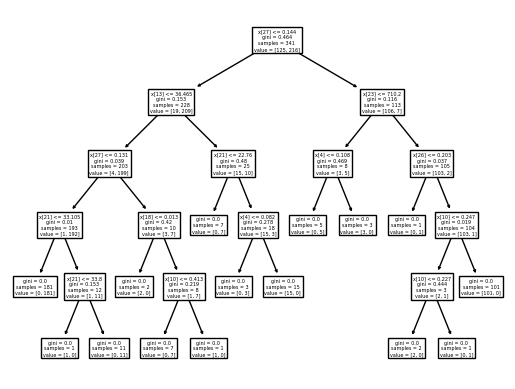

In [ ]:
# testing data 40%
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', cm)
print('Accuracy (testing data 40%%): %.2f%%' % (accuracy*100))

print(' ')
tree.plot_tree(classifier)
text_representation = tree.export_text(classifier)
print('Tree plot:\n', text_representation)

Kode di atas digunakan untuk melakukan evaluasi terhadap performa model klasifikasi dengan menggunakan confusion matrix dan menghitung akurasi, serta memvisualisasikan model klasifikasi dalam bentuk pohon keputusan.
- ***cm = confusion_matrix(y_test, y_pred)***, digunakan untuk menghitung confusion matrix berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***accuracy = accuracy_score(y_test, y_pred)***, digunakan untuk menghitung akurasi dari model klasifikasi berdasarkan label kelas aktual pada data testing (y_test) dan label kelas hasil prediksi dari model klasifikasi (y_pred).
- ***tree.plot_tree(classifier)***, digunakan untuk memvisualisasikan model klasifikasi dalam bentuk pohon keputusan. Fungsi **plot_tree** akan menghasilkan visualisasi pohon keputusan dari model klasifikasi classifier.
- ***tree.export_text(classifier)***, digunakan untuk menghasilkan representasi teks dari pohon keputusan yang dibuat oleh model klasifikasi classifier.
- ***text_representation***, digunakan untuk menampung representasi teks dari pohon keputusan.